# Занятие 2

На этом занятии мы познакомимся с основами обработки изображений.<br>
Мы будем использовать язык Python3 и популярные библиотеки, такие как OpenCV, Numpy, Matplotlib.

1. OpenCV - библиотека для обработки изображений. Содержит реализацию многих алгоритмов для edge detection, key point detection, stereo vision.
2. Numpy - основная библиотека для матричных операций, содержит алгоритмы линейной алгебры.
3. Matplotlib - библиотека для построения графиков.

Рекомендую не использовать библиотеку OpenCV при написании решений задач

In [2]:
1920 * 5

9600

## Импортируем необходимые библиотеки

In [37]:
import cv2  # OpenCV
import numpy
from matplotlib import pyplot as plt

## Загружаем изображение в память

In [38]:
# Считываем изображение с файла при помощи OpenCV
image = cv2.imread('lenna.png')

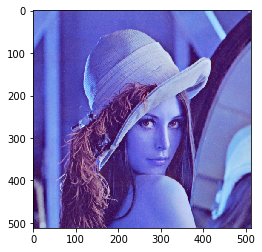

In [39]:
# Отображаем картинку при помощи Matplotlib
plt.imshow(image)

Библиотека OpenCV при загрузке изображения с файла, сохранении в файл и отображении использует BGR порядок каналов.<br>
Библиотека Matplotlib при отображении ожидает RGB порядок. Так как R и B каналы поменялись местами, то изображение выглядит синим.

In [40]:
# Меняем К и B каналы местами
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

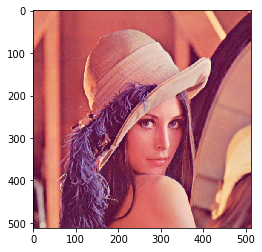

In [41]:
# Отображаем картинку при помощи Matplotlib
plt.imshow(image)

## Структура хранения изображения

Библиотеки OpenCV и Matplotlib используют адресацию (row, column, channel)

In [42]:
# Вывод значений интерсивности первой строки
image[0][4][0]

226

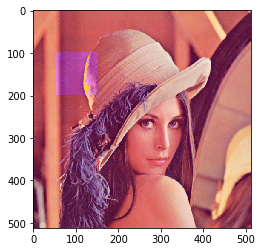

In [43]:
# Умножьте значения синего канала на 2 в квадрате, где строки с 100-200, колонки с 55-150
new_image = image.copy()

new_image[99:200, 54:150, 2] = new_image[99:200, 54:150, 2] * 2

#for i in range(99, 200):
#    for j in range(54, 150):
#        new_image[i][j][2] = new_image[i][j][2] * 2

plt.imshow(new_image)

## Манипуляции с яркостью

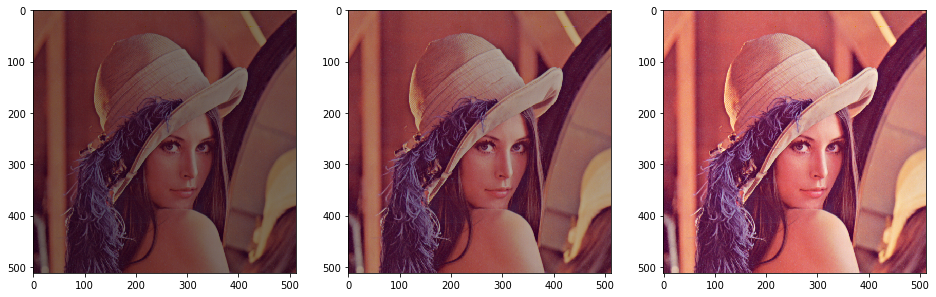

In [44]:
# Уменьшите яркость изображения в 2 раза
bright_image = image.copy()

bright_image = bright_image // 2

gamma = 2.2
bright_image_gamma = image.copy()
bright_image_gamma = bright_image_gamma / 255
bright_image_gamma = numpy.power(bright_image_gamma, gamma)
bright_image_gamma = bright_image_gamma / 2
bright_image_gamma = numpy.power(bright_image_gamma, 1/2.2)

figure = plt.figure(figsize=(16, 16))
figure.add_subplot(1,3, 1)
plt.imshow(bright_image)
figure.add_subplot(1,3,2)
plt.imshow(bright_image_gamma)
figure.add_subplot(1,3,3)
plt.imshow(image)

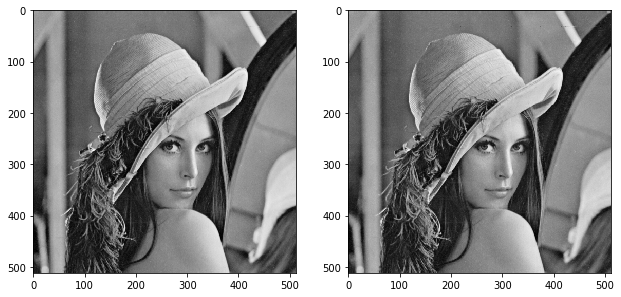

In [45]:
# Давайте переведем изображение в оттенки серого
gray_image = image.copy()

gray_image_balanced = gray_image[:,:,0] * 0.3 + gray_image[:,:,1] * 0.59 + gray_image[:,:,2] * 0.11
gray_image_equal = gray_image.sum(axis=2)/3

figure = plt.figure(figsize=(16, 16))
figure.add_subplot(1,3, 1)
plt.imshow(gray_image_balanced, cmap = "gray")
figure.add_subplot(1,3,2)
plt.imshow(gray_image_equal, cmap = "gray")

## Итерполяция

Вспомним картинку с лекции. <br>
Давайте найдем цвет точки при помощи метода ближайшего соседа и билинейной интерполяции.

<img src='interpolation.png' width=300 align='left'>

In [46]:
# Цвет точки методом ближайшего соседа
# Реализуйте метод
def nn_interpolation(nearest_colors, point_cord):
    """
    Находит цвет точки в RGB методом ближайшего соседа
    :param nearest_colors: Матрица, где 2 строки и 2 столбаца. В ячейке (0, 0) верхняя левая точка, в (1, 1) нижняя правая. 
        Пример: [
                    [[11,11,11], [22,22,22]],
                    [[33,33,33], [100,105,150]]
                ] 
    :param point_cord: Кордината искомой точки внутри квадрата. Значения координат от 0 до 1
    :return: point_color список из 3-ч значений RGB цвета искомой точки
    """
    
    point_color = [0, 0, 0]
    
    row = 0 if point_cord[0] < 0.5 else 1
    column = 0 if point_cord[1] < 0.5 else 1
    
    point_color = nearest_colors[row][column].copy()
    return point_color

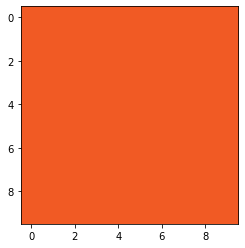

In [47]:
nearest_colors = numpy.array([
                    [[0,255,255], [241,90,36]],
                    [[241,90,36], [255,255,0]]
                ])
point_cord = [0.5, 5/14]

new_color = nn_interpolation(nearest_colors, point_cord)

color_square = [[new_color]*10]*10
plt.imshow(color_square)

In [54]:
# Цвет точки методом билинейной интерполяции
# Реализуйте метод
def bilinear_interpolation(nearest_colors, point_cord):
    """
    Находит цвет точки в RGB методом билинейной интерполяции
    :param nearest_colors: Матрица, где 2 строки и 2 столбаца. В ячейке (0, 0) верхняя левая точка, в (1, 1) нижняя правая. 
        Пример: [
                    [[11,11,11], [22,22,22]],
                    [[33,33,33], [100,105,150]]
                ] 
    :param point_cord: Кордината искомой точки внутри квадрата. Значения координат от 0 до 1
    :return: point_color список из 3-ч значений RGB цвета искомой точки
    """
    point_color = [0, 0, 0]
    
    right_color = nearest_colors[0][0] * (1 - point_cord[0]) + nearest_colors[1][0] * point_cord[0]
    left_color = nearest_colors[0][1] * (1 - point_cord[0]) + nearest_colors[1][1] * point_cord[0]
    
    point_color = right_color * (1 - point_cord[1]) + left_color * point_cord[1]
    point_color = numpy.round(point_color).astype(numpy.uint8)
    
    return point_color

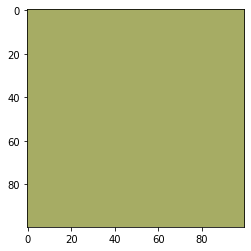

In [55]:
new_color = bilinear_interpolation(nearest_colors, point_cord)

color_square = [[new_color]*100]*100
plt.imshow(color_square)

## Увеличение размера изображения

Реализуйте метод увеличения размера изобажения, пройденный на лекции.

Метод принимает исходную картинку, новый размер, и название метода интерполяции, который будет применен.

Используйте ранее реализованные методы интерполяции.<br><br>

<img src='resize_example.jpg' width=300 align='left'>

In [56]:
def resize(image, size, method='bilinear'):
    """
    Создает увеличенную в размерах копию исходного изображения.
    :param image: Картинка в формате 3d тензора
        Пример: [
                    [[11,11,11], [22,22,22]],
                    [[33,33,33], [100,105,150]]
                ] 
    :param size: Список из 2-х элементов. Новая ширина и длинна
    :param method: Название метода интерполяции, строковое значение
    :return: point_color список из 3-ч значений RGB цвета искомой точки
    """
    interpolation = {
        'nn': nn_interpolation,
        'bilinear': bilinear_interpolation
    }
    
    new_image = numpy.zeros([size[0], size[1], 3])
    
    # Расчитываем коэфиценты уравнения соотношения x координаты (колонок)
    def dimension_relation(old_dim, new_dim):
        a = [[-0.5, 1], [new_dim, 1]]
        b = [-0.5, old_dim + 0.5]
        cord_relation = numpy.linalg.solve(a, b)
        return cord_relation
    
    x_cord_coef = dimension_relation(image.shape[1], size[1])
    y_cord_coef = dimension_relation(image.shape[0], size[0])
    
    # f
    for row in range(size[0]):
        for column in range(size[1]):
            point_column = numpy.dot(x_cord_coef, numpy.array([column, 1]))
            point_row = numpy.dot(y_cord_coef, numpy.array([row, 1]))
            
            point_column = numpy.clip(point_column, 0, image.shape[1] - 1)
            point_row = numpy.clip(point_row, 0, image.shape[0] - 1)
            
            top = numpy.floor(point_row).astype(numpy.uint)
            right = numpy.ceil(point_column).astype(numpy.uint)
            bottom = numpy.ceil(point_row).astype(numpy.uint)
            left = numpy.floor(point_column).astype(numpy.uint)
            
            nearest_colors = [
                [image[top][left], image[top][right]],
                [image[bottom][left], image[bottom][right]]
            ]
            
            point_cord = [numpy.modf(point_row)[0], numpy.modf(point_column)[0]]
            
            new_color = interpolation.get(method)(nearest_colors, point_cord)
            
            new_image[row][column][:] = new_color
    
    return new_image.astype(numpy.uint8) 

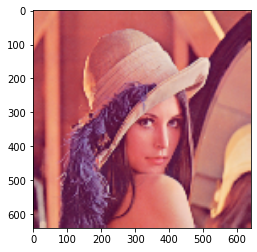

In [57]:
# Запустите эту ячейку без изменений. В результате должно отобразится увеличенное изображение Ленны
lenna_128 = cv2.imread('lenna_128.png')
lenna_128 = cv2.cvtColor(lenna_128, cv2.COLOR_BGR2RGB)

new_image = resize(lenna_128, (640, 640), 'bilinear')
plt.imshow(new_image)

In [58]:
new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('tmp.png', new_image)

True